# DATA SCIENCE CHALLENGE

### PROBLEM DEFINITION

To Build a model to predict whether the policyholder will pay next premium on time or not

### List of Variables affecting the problem objective(target):

1. ID
2. Perc_premium_paid_by_cash_credit : Percentage of premium amount paid by cash or credit card
3. Age_in_days : Age in days of policy holders
4. Income : Monthly Income of policy holders
5. Count_3-6_months_late : No of premiums late by 3 to 6 months
6. Count_6-12_months_late : No of premiums late by 6 to 12 months
7. Count_more_than_12_months_late : No of premiums late by more than 12 months
8. Application_underwriting_score : Underwriting Score of the applicant at the time of application  
9. No_of_premiums_paid : Total premiums paid on time till now
10. Sourcing_channels : Sourcing channel for application
11. Residence_area_types : Area type of Residence {Urban/Rural}
12. Target : 1 - premium paid , 0 - premium not paid on time

In [1]:
# IMPORTING THE LIBRARIES 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LOADING THE DATASET USING PANDAS LIBRARY
df=pd.read_csv('train.csv')
# LOOKING THROUGH THR FIRST FIVE DATA WHICH IS PRESENT IN THE DATASET
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


# CHECKING FOR THE MISSING VALUES

In [3]:
df.isnull().sum()
# WE HAVE TO REMOVE THE MISSING VALUES
# YES,THERE ARE MISSING VALUES

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [4]:
#IDENTIFICATIONS OF THE VARIABLES.
df.dtypes
#WE HAVE SOURCING AND RESIDENCE AS OBJECT

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

## VARIABLE ANALYSIS

In [5]:
# DESCRIBING THE DATASET IN TERMS OF MEAN,MEDIAN ,MODE WHICH GIVES COMPLERE DESCRIPTION
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


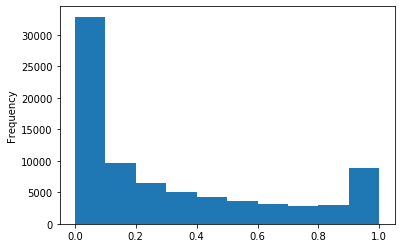

In [6]:
#ANALYSIS INCOME,AGE_IN_DAYS,PERC_PREMIUM_PAID_BY_CASH_CREDIT
df['perc_premium_paid_by_cash_credit'].plot.hist()
plt.show()

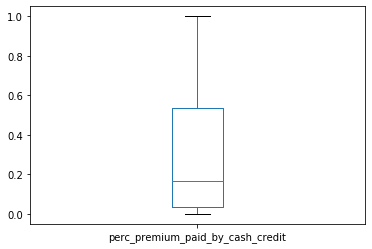

In [7]:
# Plotting a boxplot fro the descriptive analysis

df['perc_premium_paid_by_cash_credit'].plot.box()
plt.show()

#  No outliers found

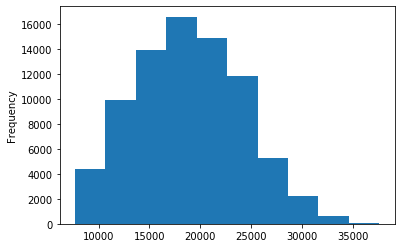

In [8]:
df['age_in_days'].plot.hist()
plt.show()
# IT IS RIGHT  SKEWED , IN ORDER TO MAKE IT AS NORMAL DISTRIBUTION WE HAVE TO TAKE THE POWER OF 1/4th

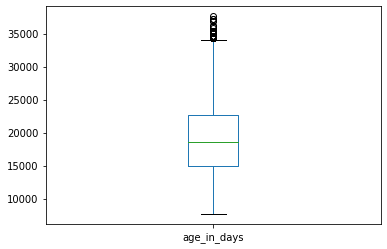

In [9]:
# Plotting a boxplot fro the descriptive analysis

df['age_in_days'].plot.box()
plt.show()

# OUTLIERS ARE FOUND

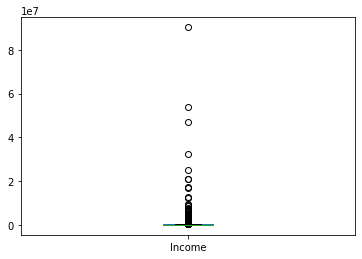

In [10]:
df['Income'].plot.box()
plt.show()

# OUTLIERS ARE FOUND IN INCOME

# UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

In [11]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [12]:
#  ANALYSING SOURCE CHANNEL

df['sourcing_channel'].value_counts()/len(df) *100
# E HAS THE LEAST AND A HAS THE MOST

A    54.016756
B    20.677996
C    15.076453
D     9.466144
E     0.762651
Name: sourcing_channel, dtype: float64

In [13]:
# ANALYSING RESIDENCE TYPES WHICH IS PRESENT IN DATASET residence type

df['residence_area_type'].value_counts()/len(df['residence_area_type']) *100


# RURAL HAS AROUND 39% AND URBAN HAS AROUND 60%[URBAN IS HIGHEST]



Urban    60.339624
Rural    39.660376
Name: residence_area_type, dtype: float64

In [14]:
# ANALYSING THE TARGET VARIABLE 
df['target'].value_counts()/len(df['target']) *100

# 93% ARE AROUND TO PAY THE PREMIUM ,WHILE THE REST OR NOT

1    93.740999
0     6.259001
Name: target, dtype: float64

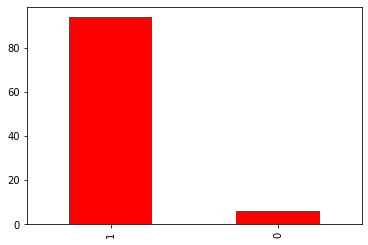

In [15]:
(df['target'].value_counts()/len(df['target'])*100).plot.bar(color='red')
plt.show()

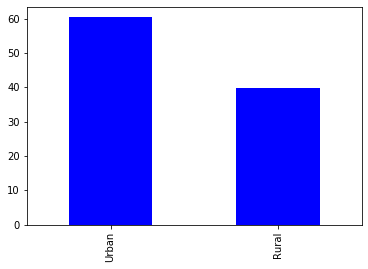

In [16]:

(df['residence_area_type'].value_counts()/len(df['residence_area_type']) *100).plot.bar(color='blue')
plt.show()

# BI-VARIATE ANALYSIS FOR CONTINUOUS AND CONTINUOUS VARIABLE

In [17]:
# ANALYSING THE CO-RELATION BETWEEN VARIABLES

df.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


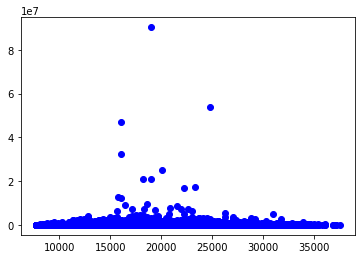

In [18]:
# ANALYSING THE RELATION BETWEEN AGE_IN_DAYS AND INCOME 
plt.scatter(df['age_in_days'],df['Income'],color='blue')
plt.show()
# NO RELATION OUTLIERS ARE PRESENT

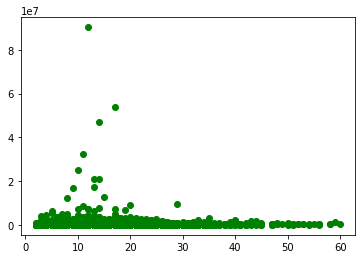

In [19]:
# ANALYSING THE RELATION BETWEEN NO_OF_PREMIUMS_PAID AND INCOME

plt.scatter(df['no_of_premiums_paid'],df['Income'],color='green')
plt.show()

#  NO RELATION , OUTLIERS ARE PRESENT IN INCOME

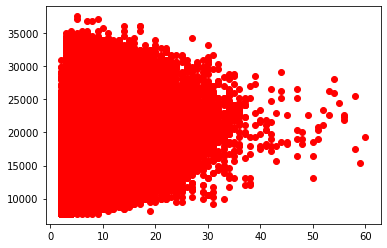

In [20]:
# ANALYSING THE RELATION BETWEEN NO_OF_PREMIUMS_PAID AND AGE_IN_DAYS
plt.scatter(df['no_of_premiums_paid'],df['age_in_days'],color='red')
plt.show()
# NO RELATION BETWEEN THEM AGAIN THE OUTLIERS ARE PRESENT IN AGE_IN_DAYS

# CATEGORICAL AND CONTINUOUS VARIABLES  ANALYSIS

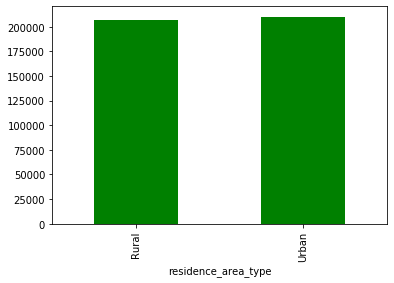

In [21]:
# ANALYSING THE MEAN OF INCOME OF DIFFERENT RESIDENCE TYPES

df.groupby('residence_area_type')['Income'].mean().plot.bar(color='green')
plt.show()

# MEAN INCOME FOR URBAN POLICIES ARE HIGHER THAN RURAL

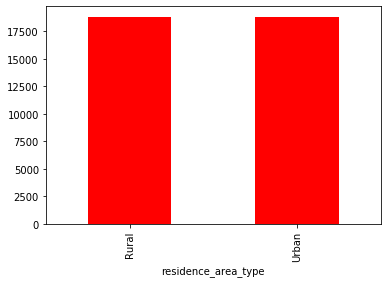

In [22]:
# ANALYSING THE MEAN OF AGE_IN_DAYS OF DIFFERENT RESIDENCE TYPES

df.groupby('residence_area_type')['age_in_days'].mean().plot.bar(color='red')
plt.show()

# THERE IS NO MUCH DIFFERENCE IN MEAN AGE_IN_DAYS OF DIFFERENT RESIDENCE AREA TYPES



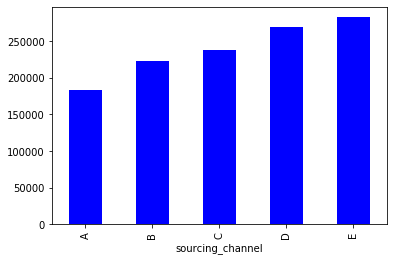

In [23]:
# ANALYSING THE MEAN OF INCOME FROM DIFFERENT SOURCING CHANNELS

df.groupby('sourcing_channel')['Income'].mean().plot.bar(color='blue')

# MEAN INCOME FOR SOURCING CHANNEL FROM E HAS THE HIGHEST
plt.show()



# CATEGORICAL AND CATEGORICAL BI-VARIATE ANALYSIS

In [24]:
# ANALYSING THE RELATION BETWEEN SOURCING CHANNEL AND TARGET

pd.crosstab(df['sourcing_channel'], df["target"])

target,0,1
sourcing_channel,,
A,2349,40785
B,1066,15446
C,903,11136
D,634,6925
E,46,563


In [25]:
# PERFORMING CHISQAURED TEST
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['sourcing_channel'], df['target']))

(141.43673259821205,
 1.390061884429808e-29,
 4,
 array([[2.69975745e+03, 4.04342425e+04],
        [1.03348623e+03, 1.54785138e+04],
        [7.53521120e+02, 1.12854789e+04],
        [4.73117879e+02, 7.08588212e+03],
        [3.81173156e+01, 5.70882684e+02]]))

In [26]:
# ANALYSING THE RELATION BETWEEN RESIDENCE_AREA_TYPE AND TARGET

pd.crosstab(df['residence_area_type'], df["target"])
# URBAN HAS MORE IN TERMS OF PREMIUM PAID ONTIME OR PREMIUM NOT PAID ONTIME

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


In [27]:
# PERFORMING CHI-SQAURED TEST
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['residence_area_type'], df['target']))
#URBAN HAS MORE WHEN IT IS COMPARED TO RURAL

(0.2080863817891421,
 0.6482714305747836,
 1,
 array([[ 1982.22558952, 29687.77441048],
        [ 3015.77441048, 45167.22558952]]))

# CHECKING THE OUTLIERS

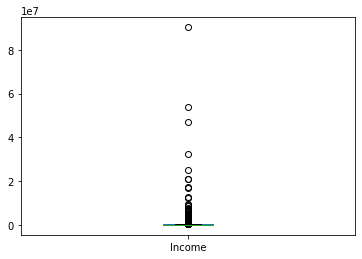

In [28]:
df['Income'].plot.box()
plt.show()
#OUTLIERS ARE PRESENT 

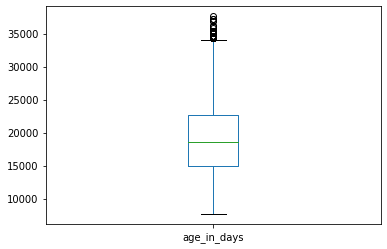

In [29]:
df['age_in_days'].plot.box()
plt.show()
#OUTLIERS ARE PRESENT

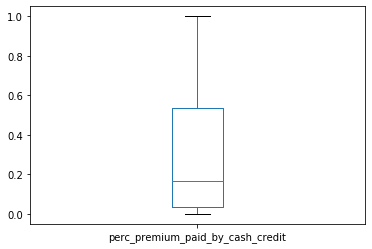

In [30]:
df['perc_premium_paid_by_cash_credit'].plot.box()
plt.show()
# NO OUTLIERS

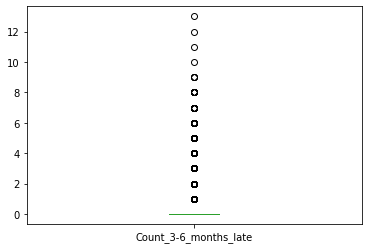

In [31]:
df['Count_3-6_months_late'].plot.box()
plt.show()

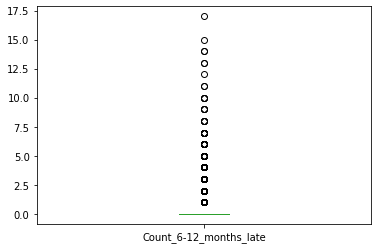

In [32]:
df['Count_6-12_months_late'].plot.box()
plt.show()

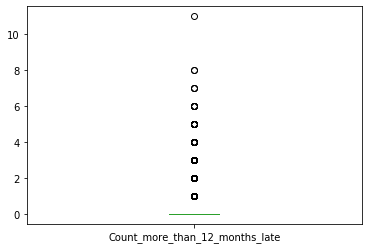

In [33]:
df['Count_more_than_12_months_late'].plot.box()
plt.show()

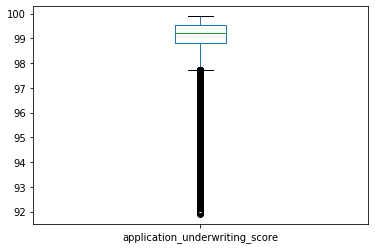

In [34]:
df['application_underwriting_score'].plot.box()
plt.show()
# THERE ARE OUTLIERS BELOW LOWER WHISKER

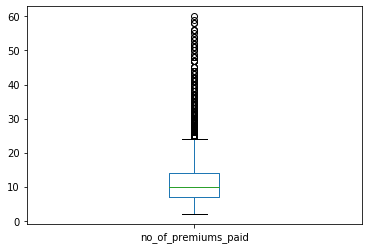

In [35]:
df['no_of_premiums_paid'].plot.box()
plt.show()
# THERE ARE OUTLIERS ABOVE UPPER WHISKER

# TREATMENT FOR THE OUTLIERS

In [36]:
# AGE_IN_DAYS WHICH ARE GREATER THAN QUANTILE .81 ARE REMOVED 
df = df[df['age_in_days']<(df['age_in_days'].quantile(.81))]

In [37]:
# PERC_PREMIUM_PAID_BY_CASH_CREDIT GREATER THAN 0.715 ARE REMOVED 
df = df[df['perc_premium_paid_by_cash_credit']<0.715]

In [38]:
# PERC_PREMIUM_PAID_BY_CASH_CREDIT GREATER THAN QUANTILE .30 ARE RETAINED SO THAT THE LOW VALUES WILL BE ALTERED
df = df[df['perc_premium_paid_by_cash_credit']>df['perc_premium_paid_by_cash_credit'].quantile(.30)]

In [39]:
# REMOVING OUTLIERS FOR APPLICATION_UNDERWRITING_SCORE
df=df[df['application_underwriting_score']>95]
df = df[df['application_underwriting_score']<df['application_underwriting_score'].quantile(.91)]

In [40]:
df.head()
df.shape


(32385, 12)

In [41]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.18,9,B,Rural,1
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,1
10,87400,0.051,17529,200100,1.0,0.0,0.0,98.66,22,C,Rural,1


In [42]:
# REMOVING THE SOURCING_CHANNEL,RESIDENCE_AREA_TYPE AND ID

df=df.drop(columns=['sourcing_channel','residence_area_type','id'])


In [43]:
df.shape

(32385, 9)

# MISSING VALUE IMPUTATION IN THE DATASET

In [44]:
#IMPUTING MISSING VALUES OF COUNT_3-6_MONTHS_LATE
df['Count_3-6_months_late'].fillna(df['Count_3-6_months_late'].std(ddof=0)/.4+df['Count_3-6_months_late'].min()/.2,inplace = True)

In [45]:
# IMPUTING MISSING VALUES OF COUNT_6-12_MONTHS_LATE
# IMPUTING MISSING VALUES OF COUNT_MORE_THAN_12_MONTHS_LATE
# STD GIVES US THE SPREAD OF DATA SO WE HAVE DIVIDED THAT BY ITS MINIMUM VALUE , SO THAT THE VALUE WILL BE INTACT AND OUTLIERS
# ARE REDUCED

df['Count_6-12_months_late'].fillna(df['Count_6-12_months_late'].std(ddof=0)/.4+df['Count_6-12_months_late'].min()/.2,inplace = True)
df['Count_more_than_12_months_late'].fillna((np.std(df['Count_more_than_12_months_late'])/.4+df['Count_more_than_12_months_late'].min()/.2),inplace = True)

In [46]:
#IMPUTING THE MISSING VALUES OF 'application_underwriting_score'
# CREATING A NEW VARIABLE CALLED 'simplified_underwriting_score' BY SUBTRACTING 90 FROM 'application_underwriting_score'
# BY CREATING A NEW VARIABLE WE CAN GET GOOD PERFORMACE FROM THE MODEL.


df['application_underwriting_score'].fillna(df['application_underwriting_score'].quantile(.0302),inplace = True)
df['simplified_underwriting_score'] = df['application_underwriting_score'] - 90

In [47]:
# CHECKING IF THERE IS ANY MISSING VALUES AFTER IMPUTATION
df.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
target                              0
simplified_underwriting_score       0
dtype: int64

In [48]:
df.shape

(32385, 10)

In [49]:
df.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,simplified_underwriting_score
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,1,9.02
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,1,9.57
5,0.540,17527,282080,2.0,0.0,0.0,99.18,9,1,9.18
8,0.621,9868,92520,0.0,0.0,0.0,99.58,4,1,9.58
10,0.051,17529,200100,1.0,0.0,0.0,98.66,22,1,8.66


# AS ALL THE OUTLIERS AND MISSING VALUES ARE REMOVED LET US REFORM THE DATA TO INCREASE THE PERFORMANCE

In [50]:
# GREATER THAN 97 ARE RETAINED
df = df[df['application_underwriting_score']>97]
df = df[df['application_underwriting_score']<df['application_underwriting_score'].quantile(.9315)]

In [51]:
# NO_OF_PREMIUMS_PAID LESS THAN 50.95 ARE RETAINED
df = df[df['no_of_premiums_paid']<50.95]
df = df[df['age_in_days']<df['age_in_days'].quantile(1.00)]

In [52]:

df = df[df['Count_3-6_months_late']<7]
df = df[df['Count_6-12_months_late']<9]
df= df[df['Count_more_than_12_months_late']<4.5]

In [53]:
df = df[df['no_of_premiums_paid']>df['no_of_premiums_paid'].quantile(.1)]
df = df[df['age_in_days']>df['age_in_days'].quantile(.155)]
df = df[df['Count_more_than_12_months_late']<2]
df = df[df['no_of_premiums_paid']<33]

In [54]:
df = df[df['Income']>0.15]


In [55]:
# NOW LET US REDUCE BIG DIGIT NUMERS OF INCOME AND AGE_IN_DAYS TO SMALL DIGIT NUMBERS BY TAKING 1/4th AS THE POWER
df['Income']=np.power(df['Income'],1/4)
df['age_in_days']=np.power(df['age_in_days'],1/4)


In [57]:
df.head()
df

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,simplified_underwriting_score
3,0.049,11.129186,22.372075,0.0,0.0,0.0,99.57,9,1,9.57
5,0.540,11.506067,23.045868,2.0,0.0,0.0,99.18,9,1,9.18
10,0.051,11.506395,21.150068,1.0,0.0,0.0,98.66,22,1,8.66
13,0.111,11.850679,19.203692,0.0,0.0,0.0,99.59,9,1,9.59
17,0.125,12.266321,23.692754,0.0,0.0,0.0,99.31,14,1,9.31
...,...,...,...,...,...,...,...,...,...,...
79842,0.310,11.321641,24.543403,0.0,0.0,0.0,99.16,15,1,9.16
79846,0.118,12.216715,21.015882,0.0,0.0,0.0,99.25,11,1,9.25
79848,0.425,12.363765,21.768488,1.0,0.0,0.0,98.70,19,1,8.70
79849,0.704,11.795162,22.985789,1.0,0.0,1.0,99.42,12,1,9.42


In [57]:
df.shape

(21031, 10)

# NOW LET US DO FOR THE TEST DATA SAME PROCESS WHAT WE DID FOR THE TRAIN DATA

In [58]:
df1=pd.read_csv('test.csv')

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
# PERFORMING  THE SAME THING WHAT WE DID FOR THE TRAINING SET

df1['Count_3-6_months_late'].fillna(df['Count_3-6_months_late'].std(ddof=0)/.4+df['Count_3-6_months_late'].min()/.2,inplace = True)
df1['Count_6-12_months_late'].fillna(df['Count_6-12_months_late'].std(ddof=0)/.4+df['Count_6-12_months_late'].min()/.2,inplace = True)
df1['Count_more_than_12_months_late'].fillna(df['Count_more_than_12_months_late'].std(ddof=0)/.4+df['Count_more_than_12_months_late'].min()/.2,inplace = True)
df1['application_underwriting_score'].fillna(df['application_underwriting_score'].quantile(.0302),inplace = True)
df1['simplified_underwriting_score'] = df1['application_underwriting_score'] - 90

In [ ]:
df1.head()

In [ ]:
#DROPPING THE SOURCING CHANNEL AND RESIDENCE_AREA_TYPE COLUMNSt

df1=df1.drop(columns=['sourcing_channel','residence_area_type'])

In [ ]:
idss = pd.DataFrame(df1['id'])
df1 = df1.drop('id',1)

In [ ]:
# MAKING DUMMY VARIABLES FOR TRAININ AND TESTING DATA
# NOW LET US REDUCE BIG DIGIT NUMERS OF INCOME AND AGE_IN_DAYS TO SMALL DIGIT NUMBERS BY TAKING 1/4th AS THE POWER FOR TEST DATA
df1['Income']=np.power(df1['Income'],1/4)
df1['age_in_days']=np.power(df1['age_in_days'],1/4)
train = pd.get_dummies(df)
test = pd.get_dummies(df1)



In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
#SPLITTING THE TRAIN DATA INTO DEPENDENT AND INDEPENDENT VARAIBLE'

x_train = train.drop('target',1)
y_train = train['target']

In [ ]:
x_train

In [ ]:
y_train

# IMPORTING LINEAR REGRESSION FROM SCIKIT LEARN AND TRAINING TO PREDICT .

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg=LogisticRegression()

# ASSIGNING LINEAR REGRESSION FOR reg

In [ ]:
# FITTING THE DATA
reg.fit(x_train,y_train)

In [ ]:
pred = reg.predict(test)

In [ ]:
predicitions = pd.DataFrame(pred)

In [ ]:
# CHECKING FIRST 5 ROWS
predicitions.head()

pred_logreg=reg.predict_proba(test)

In [ ]:
idss['target']=pred_logreg[:,-1]

In [ ]:
idss.head()

# CONVERTING THE DATA TO .CSV FILE BY REMOVING THE INDEXING

In [ ]:
idss.to_csv('Final_data_science069.csv',index = False)

# THANK YOU